                                               # BASEBALL CASE STUDY

In [5]:
# To import all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
import math
import sklearn
from scipy.stats import boxcox as bxcx
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import (StandardScaler,
                                  PolynomialFeatures)
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from scipy.stats.mstats import normaltest
from sklearn.svm import SVR

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

In [6]:
#import dataframe
df =pd.read_csv('baseball.csv')
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [7]:
# to check number of rows and columns
df.shape

(30, 17)

In [8]:
# to check column names
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [9]:
#to check for duplicate values
df.duplicated().sum()

0

In [10]:
# to check for null values
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

In [11]:
# detailed description adout dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


# visualization

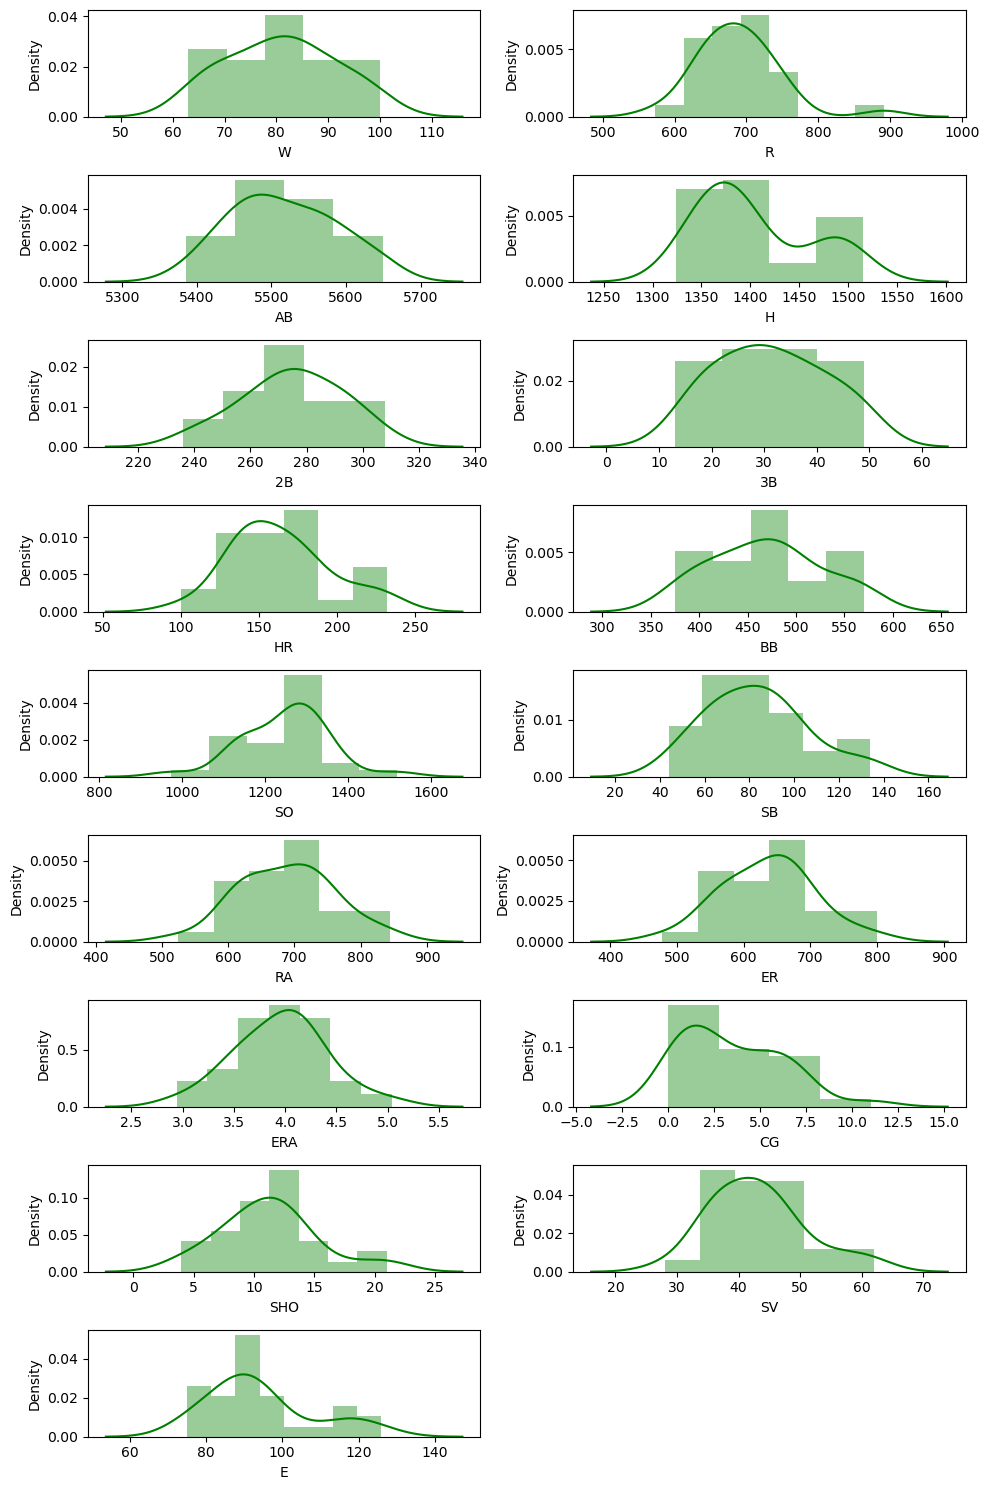

In [12]:
# to plot distplot 
columns = ['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E']
plt.figure(figsize = (10,15))
for i in range(len(columns)):
    plt.subplot(9,2, i+1)
    sns.distplot(df[columns[i]],color = 'g');
plt.tight_layout()

*most of the data is normally distributed like W,3B,ERA,SV.

*R,E,SHO,CG are right skewed and data is widely spread.

*SO is left skewed.

In [13]:
# to get statistical analysis of the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
W,30.0,80.966667,10.453455,63.00,74.0000,81.000,87.75,100.00
R,30.0,688.233333,58.761754,573.00,651.2500,689.000,718.25,891.00
AB,30.0,5516.266667,70.467372,5385.00,5464.0000,5510.000,5570.00,5649.00
H,30.0,1403.533333,57.140923,1324.00,1363.0000,1382.500,1451.50,1515.00
2B,30.0,274.733333,18.095405,236.00,262.2500,275.500,288.75,308.00
3B,30.0,31.300000,10.452355,13.00,23.0000,31.000,39.00,49.00
HR,30.0,163.633333,31.823309,100.00,140.2500,158.500,177.00,232.00
BB,30.0,469.100000,57.053725,375.00,428.2500,473.000,501.25,570.00
SO,30.0,1248.200000,103.759470,973.00,1157.5000,1261.500,1311.50,1518.00
SB,30.0,83.500000,22.815225,44.00,69.0000,83.500,96.50,134.00


*SO has highest sandard deviation of 103.75 whereas CG has the least stnadard deviation of 3.46

*There is lot of difference between mean of each column.

In [14]:
#To find the range of all columns
df.max()-df.min()

W       37.0
R      318.0
AB     264.0
H      191.0
2B      72.0
3B      36.0
HR     132.0
BB     195.0
SO     545.0
SB      90.0
RA     319.0
ER     321.0
ERA      2.1
CG      11.0
SHO     17.0
SV      34.0
E       51.0
dtype: float64

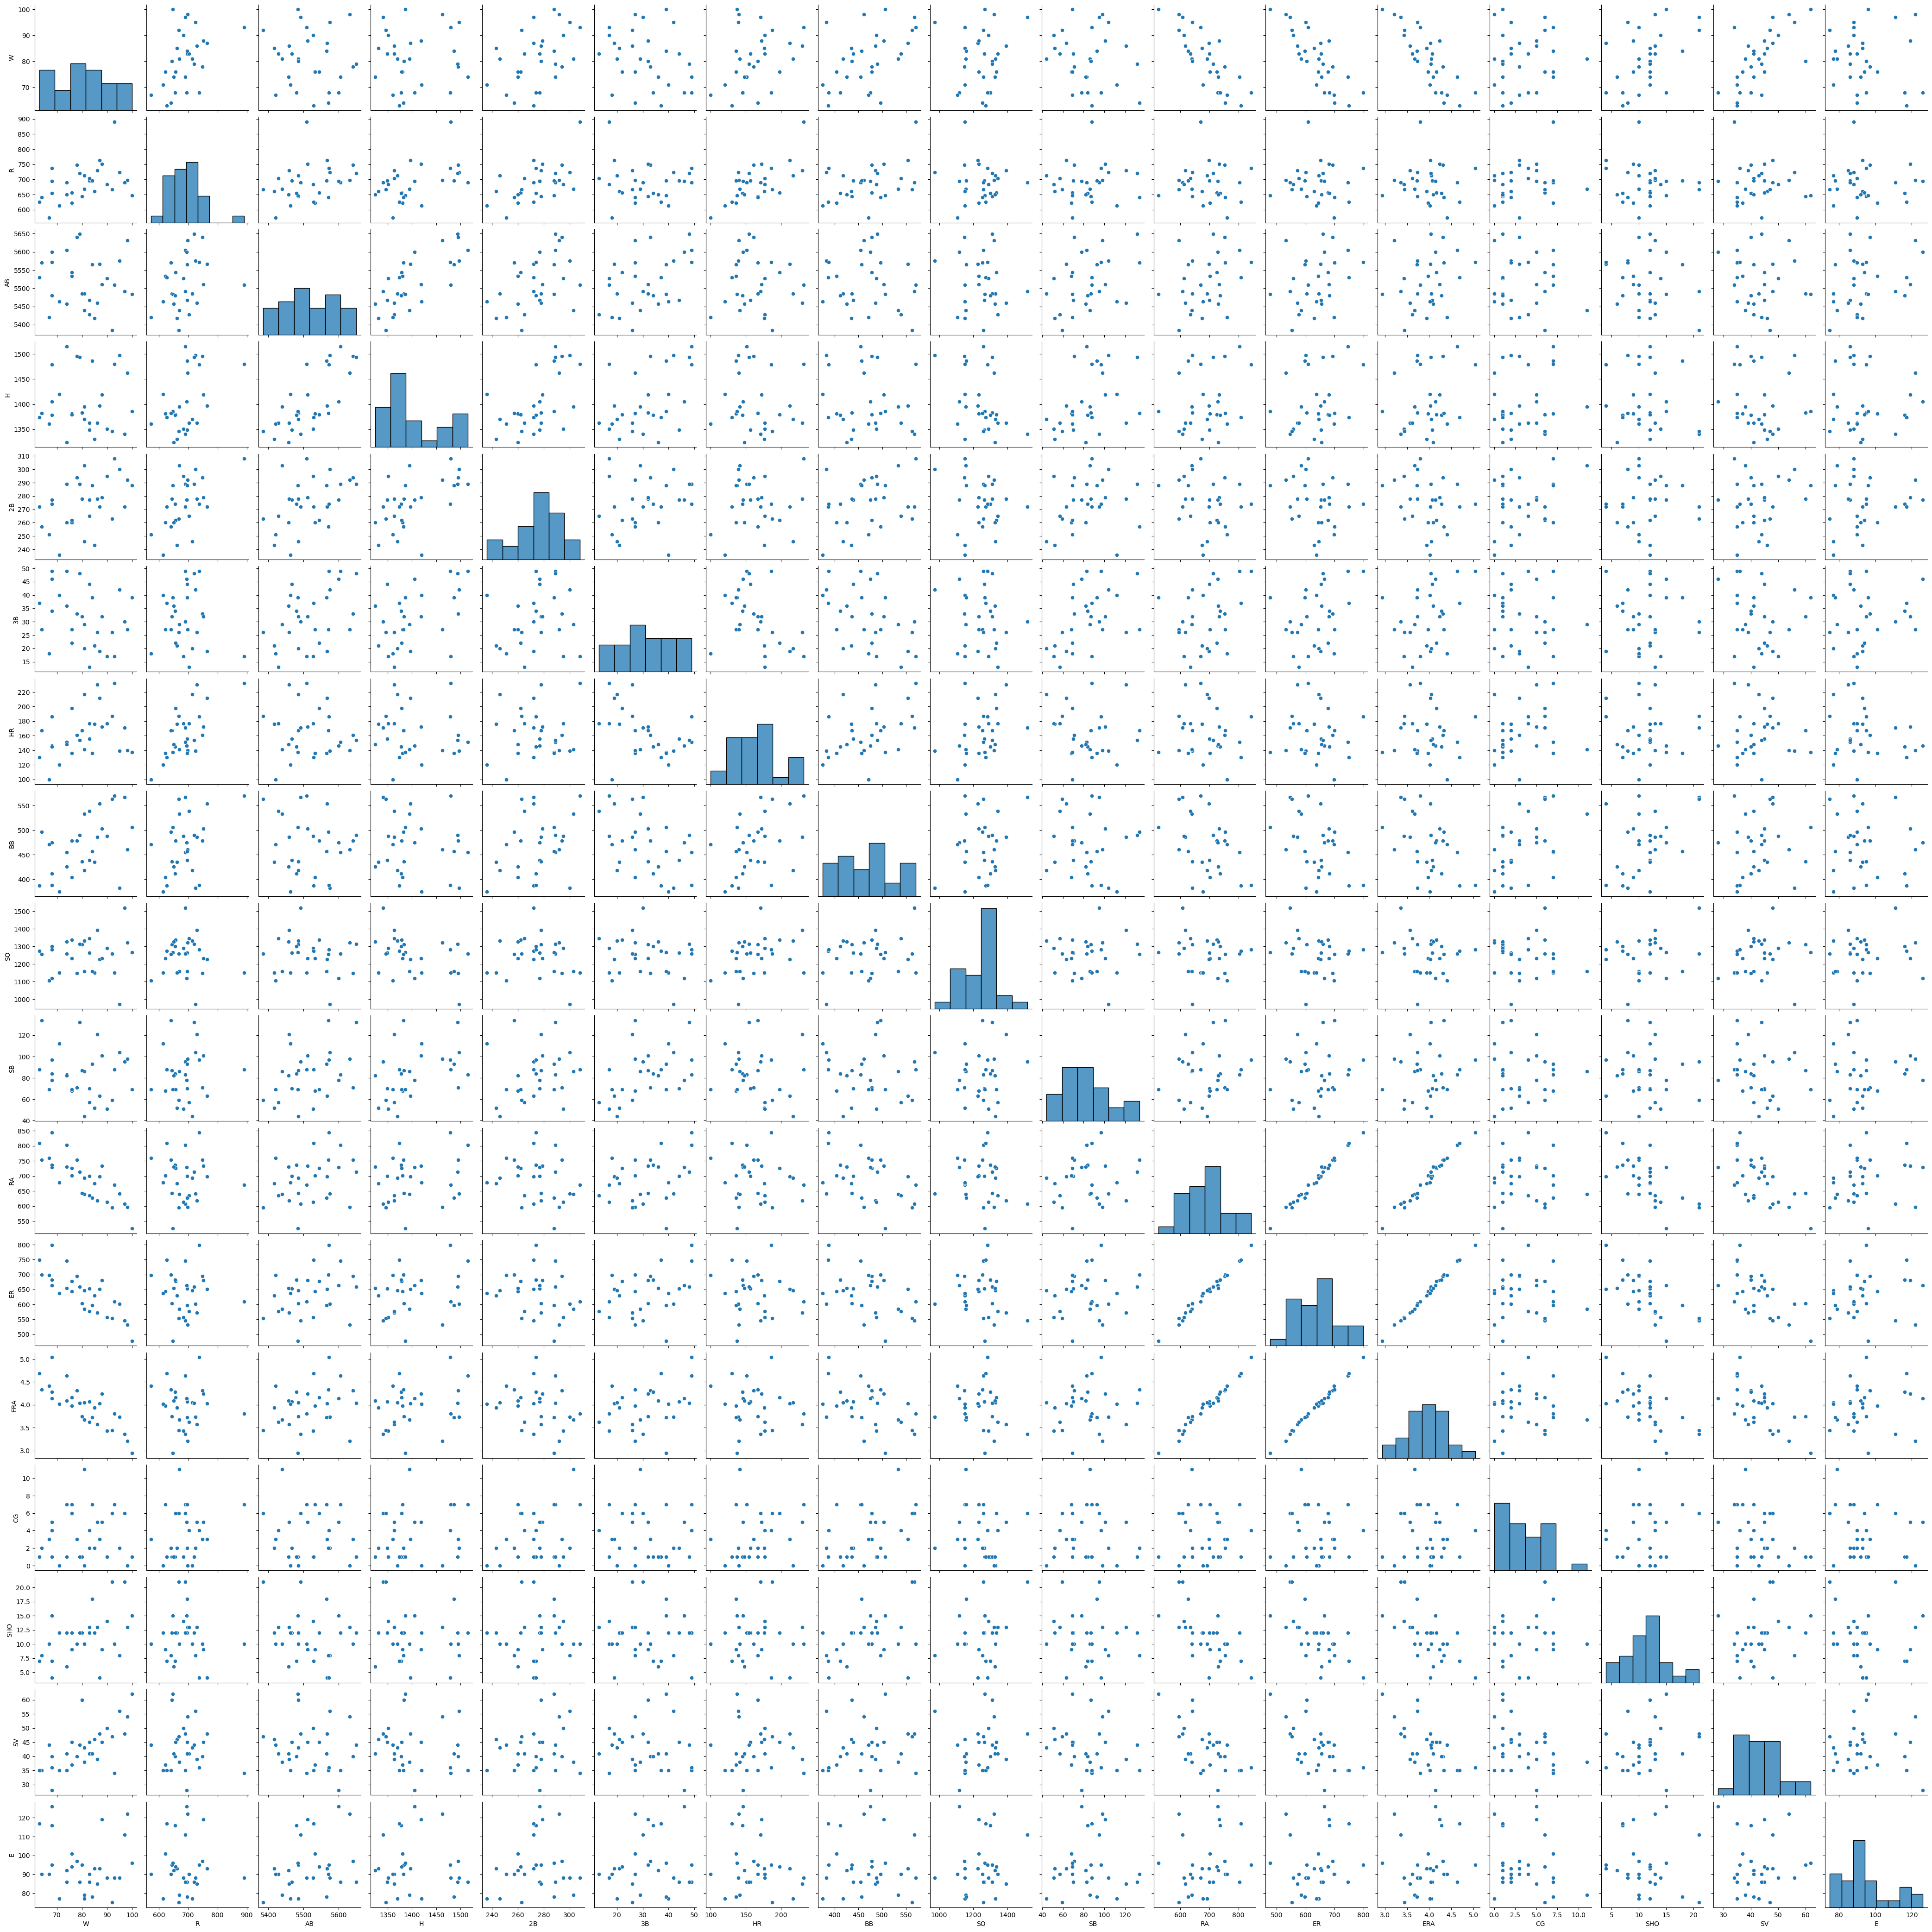

In [15]:
# to check relation among each column with one another.
sns.pairplot(data=df)

In [16]:
# to analyse the correlation of each column
df.corr()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


<AxesSubplot:>

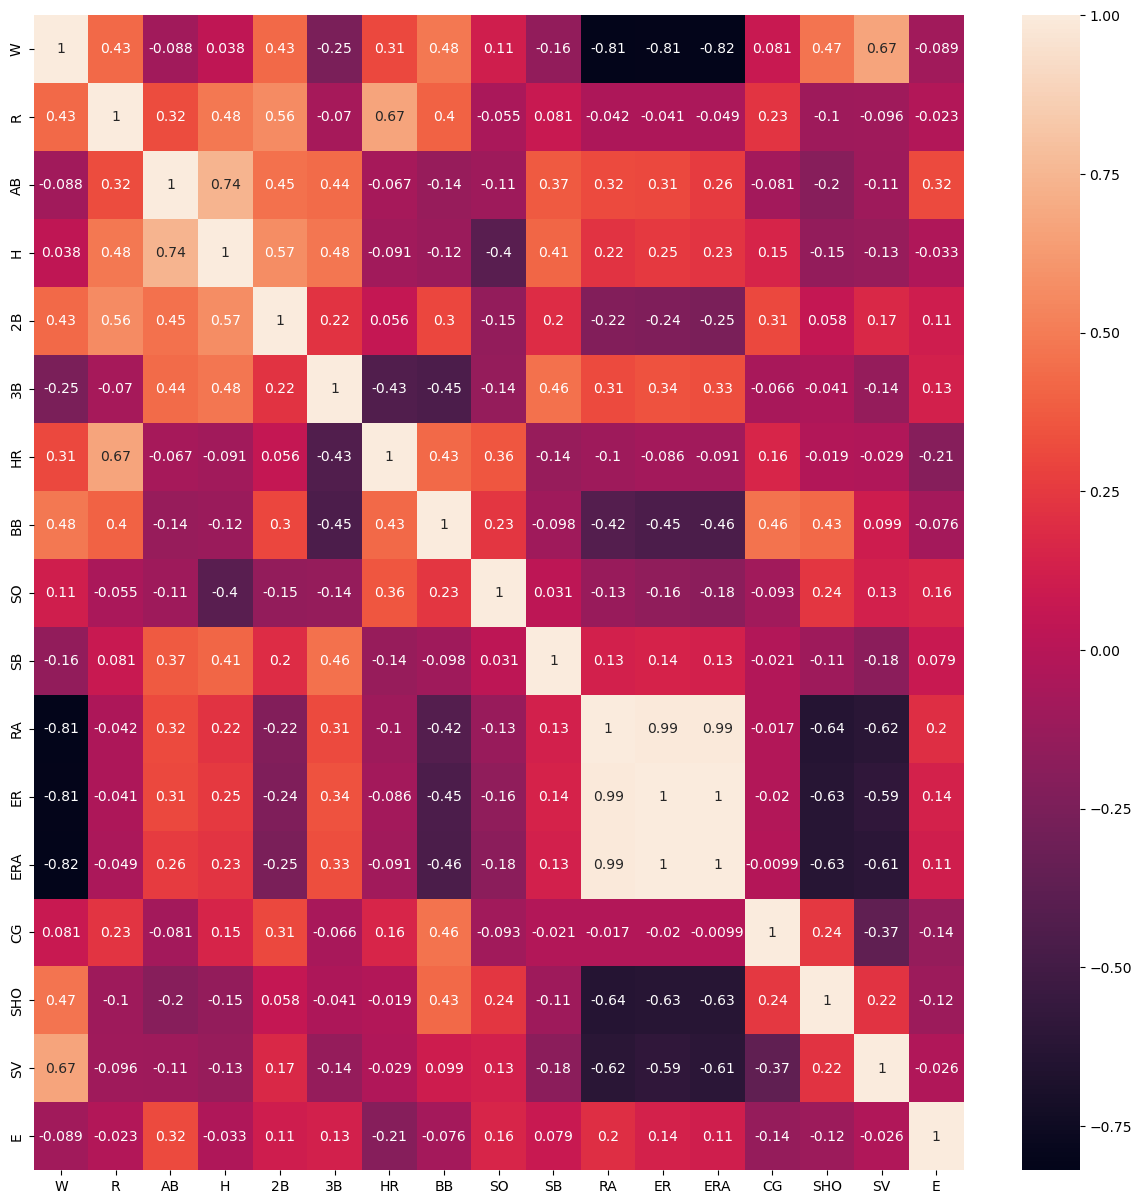

In [17]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),color ='k',annot=True)

*from thre above heatmap we can analyse that-- RA,ER,and ERA have very strong correlation among themselves but they have very negitive correlation with the label column i.e,W

*overall view of the map show us that most of the columns have positive correlation to each other ,few columns are highly correlated and few are very negitively correlated.

In [18]:
#dropping the columns with very high multicollinearity
df.drop(['RA','ER','ERA'],axis=1,inplace=True)
df.head(3)

,W,R,AB,H,2B,3B,HR,BB,SO,SB,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,11,10,38,79


In [19]:
# to check the shape of the dataframe after dropping 3 columns
df.shape

(30, 14)

In [20]:
# to check skewness in the data
df.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

W          AxesSubplot(0.125,0.77;0.133621x0.11)
R       AxesSubplot(0.285345,0.77;0.133621x0.11)
AB       AxesSubplot(0.44569,0.77;0.133621x0.11)
H       AxesSubplot(0.606034,0.77;0.133621x0.11)
2B      AxesSubplot(0.766379,0.77;0.133621x0.11)
3B        AxesSubplot(0.125,0.638;0.133621x0.11)
HR     AxesSubplot(0.285345,0.638;0.133621x0.11)
BB      AxesSubplot(0.44569,0.638;0.133621x0.11)
SO     AxesSubplot(0.606034,0.638;0.133621x0.11)
SB     AxesSubplot(0.766379,0.638;0.133621x0.11)
CG        AxesSubplot(0.125,0.506;0.133621x0.11)
SHO    AxesSubplot(0.285345,0.506;0.133621x0.11)
SV      AxesSubplot(0.44569,0.506;0.133621x0.11)
E      AxesSubplot(0.606034,0.506;0.133621x0.11)
dtype: object

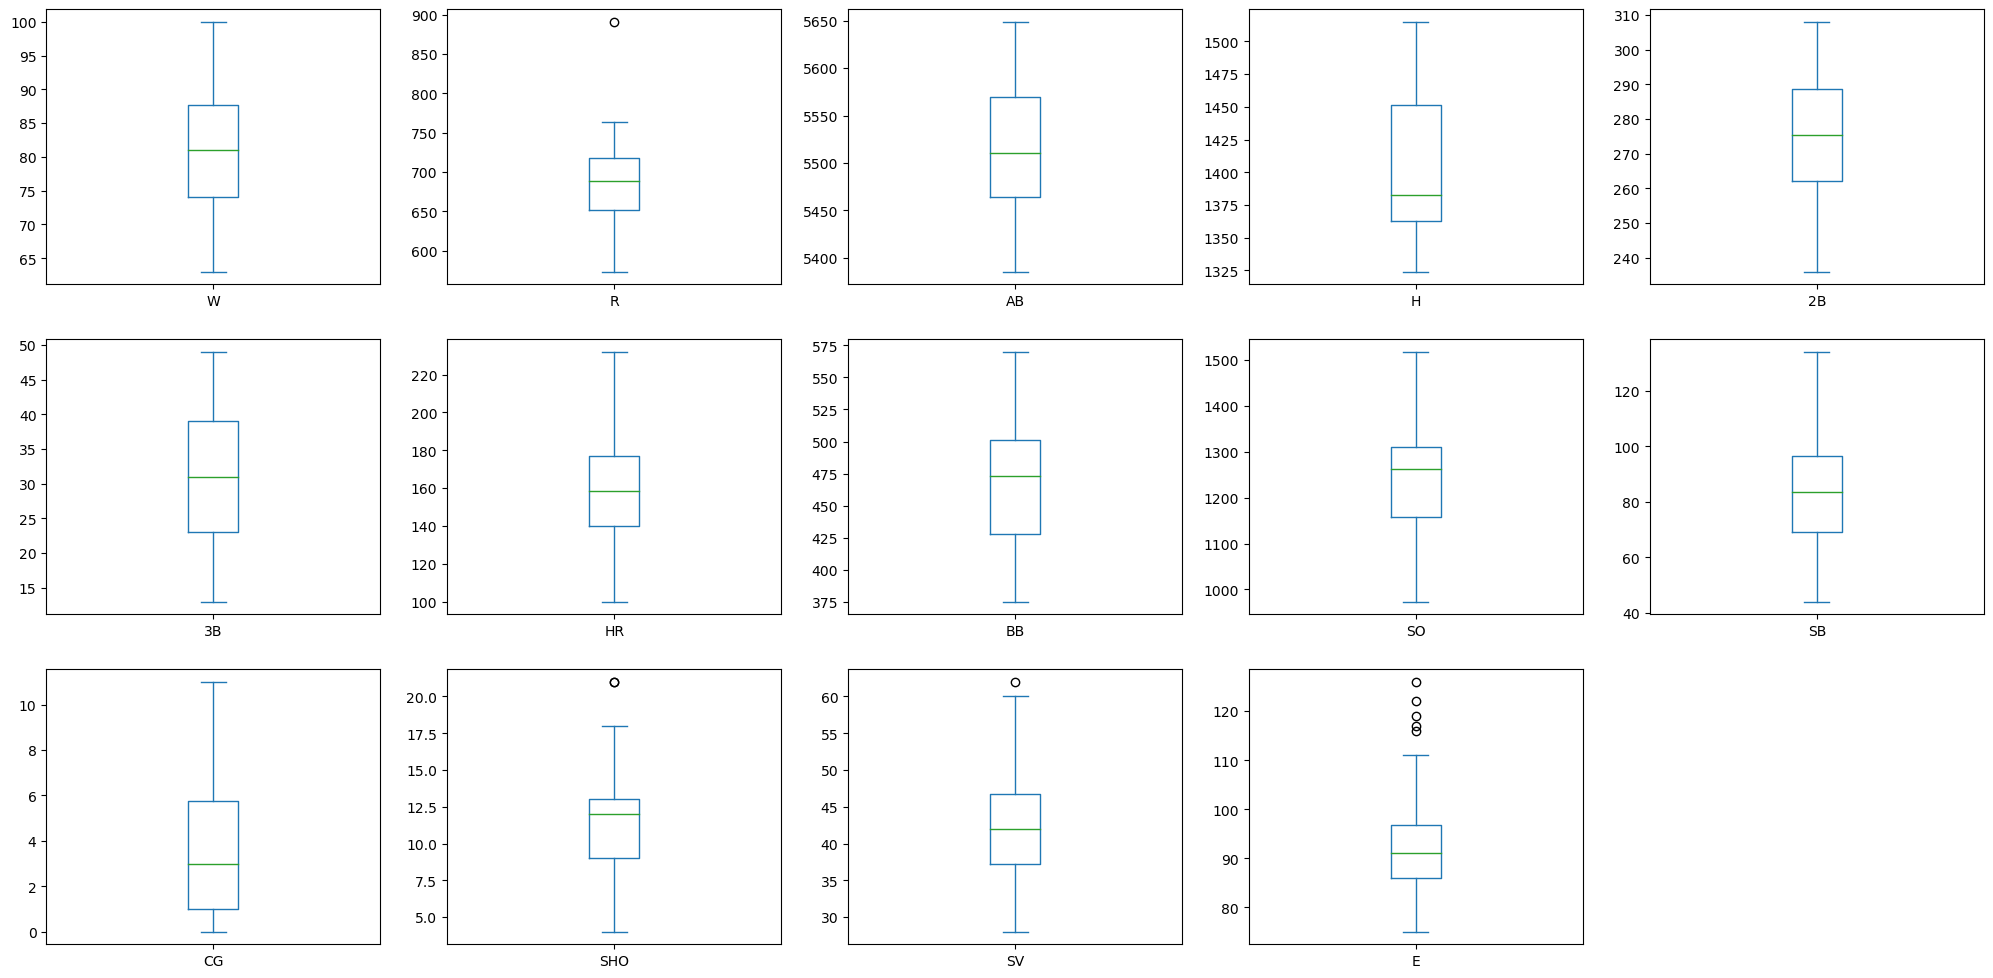

In [21]:
# to find out outliers in the dataset
df.plot(kind='box',subplots=True, layout=(6,5),figsize=(25,25))

*from the above plots we can analyse that there are very few outliers are present in the data.

*most of the outliers are present in the E column and very few are present in SHO,SV and R column

In [22]:
# To Remove these outliers we use zscore technique here
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
z.shape

(30, 14)

In [23]:
threshold=3
print(np.where(z>3))

(array([5], dtype=int64), array([1], dtype=int64))


In [24]:
# to check the shape of the dataframe after removing outliers
df_new=df[(z<3).all(axis=1)]
print(df.shape)
print(df_new.shape)

(30, 14)
(29, 14)


In [25]:
# Percentage Loss In Data
loss_percent=((30-29)/30)*100
loss_percent

3.3333333333333335

In [26]:
# to divide the data in to 2 as y (label) data and x data for making learning models
x=df_new.drop("W",axis=1)
y=df_new["W"]

In [27]:
#Scaling the Data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [28]:
# to find out best random state
max_r2=0
maxRs=0
for i in range(0,100):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    r2_score1=r2_score(y_test,pred_test)
    if r2_score1>max_r2:
        max_r2=r2_score1
        maxRs=i
print("Best r2_score is ", max_r2,"on Random_State",maxRs)

Best r2_score is  0.8891019924345595 on Random_State 97


In [29]:
# sliptting the data in to training and testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=97)

In [30]:
# assigining shortforms to make model
lr=LinearRegression()
ri=Ridge()
la=Lasso()
dtc=DecisionTreeRegressor()
svr=SVR()
rf=RandomForestRegressor()
gbr=GradientBoostingRegressor()
abr=AdaBoostRegressor()

In [31]:
model=[lr,ri,la,dtc,svr,rf,gbr,abr]

for m in model:
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    print('Mean Absolute error: of',m)
    mae=mean_absolute_error(y_test,pred)
    print(mae)
    print('Mean Squared error: of',m)
    mse=mean_squared_error(y_test,pred)
    print(mse)
    print('Root Mean Squared error: of',m)
    rmse=np.sqrt(mean_squared_error(y_test,pred))
    print(rmse)
    print('r2 score: of',m)
    r2score=r2_score(y_test,pred)
    print(r2score)
    score=cross_val_score(m,x,y,cv=5)
    crossval=score.mean()
    print("Cross Validation Score:",crossval)
    print("Difference Between r2_score and CrossValidation Score:",abs(r2score-crossval))
    print("\n")

Mean Absolute error: of LinearRegression()
2.8091656004543837
Mean Squared error: of LinearRegression()
12.73170736855461
Root Mean Squared error: of LinearRegression()
3.56815181411254
r2 score: of LinearRegression()
0.8891019924345595
Cross Validation Score: -0.12136106040128398
Difference Between r2_score and CrossValidation Score: 1.0104630528358434


Mean Absolute error: of Ridge()
3.1723990584639075
Mean Squared error: of Ridge()
11.205613140895883
Root Mean Squared error: of Ridge()
3.3474786244120938
r2 score: of Ridge()
0.9023948528738805
Cross Validation Score: -0.12495754803800123
Difference Between r2_score and CrossValidation Score: 1.0273524009118817


Mean Absolute error: of Lasso()
4.885540826843449
Mean Squared error: of Lasso()
30.538323416398786
Root Mean Squared error: of Lasso()
5.526149058467278
r2 score: of Lasso()
0.7339996024702743
Cross Validation Score: -0.10161331744085114
Difference Between r2_score and CrossValidation Score: 0.8356129199111254


Mean Absol

We See that difference between Lasso and its cross validation score is minimum so we will consider Lasso as our model

In [32]:
# hyperparameter tuning with lasso, parameters of lasso
parameter={'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 
           'fit_intercept' : [True,False],
           'normalize' : ['deprecated'], 
           'precompute' : [True,False],
           'copy_X' : [True,False],
           'max_iter' : [1000],
           'tol' : [0.0001], 
           'warm_start' : [True,False],
           'positive' : [True,False],
           'random_state' : [None],
           'selection' : ['cyclic', 'random']}

In [33]:
# hyperparameter tuning with gridsearchCV
gcv = GridSearchCV(Lasso(), parameter,scoring='r2', verbose=1, cv=10, n_jobs=-1)

In [34]:
#training the model
gcv.fit(x_train, y_train)

Fitting 10 folds for each of 448 candidates, totalling 4480 fits


GridSearchCV(cv=10, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'copy_X': [True, False],
                         'fit_intercept': [True, False], 'max_iter': [1000],
                         'normalize': ['deprecated'], 'positive': [True, False],
                         'precompute': [True, False], 'random_state': [None],
                         'selection': ['cyclic', 'random'], 'tol': [0.0001],
                         'warm_start': [True, False]},
             scoring='r2', verbose=1)

In [35]:
#finding out which parameter is giving best accuracy
gcv.best_params_

{'alpha': 1,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'normalize': 'deprecated',
 'positive': True,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': True}

In [36]:
type(gcv)

sklearn.model_selection._search.GridSearchCV

In [37]:
# finding best estimator
gcv.best_estimator_

Lasso(alpha=1, positive=True, warm_start=True)

In [38]:
# Applying the parameters to the final model
pred = gcv.best_estimator_.predict(x_test)
r2score=r2_score(y_test,pred)
print(r2score)

0.7339993258156321


In [39]:
# saving the best model with parameters
model=Lasso(alpha=0.1, normalize='deprecated', positive=True, precompute=True,
      selection='random')
model.fit(x_train,y_train)

Lasso(alpha=0.1, positive=True, precompute=True, selection='random')

In [40]:
import joblib
joblib.dump(model,'baseball.pkl')

['baseball.pkl']